# Melanoma

To solve the question: "What's the relationship between the NF2 gene and Melanoma when considering the influence of age?"

# 1. Data Preprocessing

In [6]:
import pandas as pd
import numpy as np

# Corrected file paths
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.SKCM.sampleMap_SKCM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)


In [7]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_data/public/TCGA/SKCM/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_SKCM_RPPA,_GENOMIC_ID_TCGA_SKCM_mutation_bcm_gene,_GENOMIC_ID_TCGA_SKCM_mutation_broad_gene,_GENOMIC_ID_TCGA_SKCM_gistic2,_GENOMIC_ID_TCGA_SKCM_mutation,_GENOMIC_ID_TCGA_SKCM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_SKCM_PDMRNAseqCNV,_GENOMIC_ID_TCGA_SKCM_PDMRNAseq,_GENOMIC_ID_TCGA_SKCM_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,TCGA-3N-A9WB-06,TCGA-3N-A9WB,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,71.0,NaN,TCGA-3N-A9WB,...,NaN,NaN,NaN,TCGA-3N-A9WB-06A-11D-A38G-08,TCGA-3N-A9WB-06A-11D-A38F-01,NaN,4c243ea9-dfe1-42f0-a887-3c901fb38542,NaN,NaN,4c243ea9-dfe1-42f0-a887-3c901fb38542
TCGA-3N-A9WC-06,TCGA-3N-A9WC-06,TCGA-3N-A9WC,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,TCGA-3N-A9WC-F67104,TCGA-3N-A9WC,...,TCGA-3N-A9WC-06,F9B0B31B-24AB-4F30-8EF8-4A4ED282EF04,NaN,TCGA-3N-A9WC-06A-11D-A38G-08,TCGA-3N-A9WC-06A-11D-A38F-01,NaN,a64ae1f5-a189-4173-be13-903bd7637869,NaN,NaN,a64ae1f5-a189-4173-be13-903bd7637869
TCGA-3N-A9WD-06,TCGA-3N-A9WD-06,TCGA-3N-A9WD,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,NaN,TCGA-3N-A9WD,...,TCGA-3N-A9WD-06,6AFC3678-9499-49A6-AD7A-30F3D185B4BD,NaN,TCGA-3N-A9WD-06A-11D-A38G-08,TCGA-3N-A9WD-06A-11D-A38F-01,NaN,ac19f7cf-670b-4dcc-a26b-db0f56377231,NaN,NaN,ac19f7cf-670b-4dcc-a26b-db0f56377231
TCGA-BF-A1PU-01,TCGA-BF-A1PU-01,TCGA-BF-A1PU,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,46.0,TCGA-BF-A1PU-F68906,TCGA-BF-A1PU,...,TCGA-BF-A1PU-01,7E74CAFD-C47B-4F98-A349-BBD2AC699D2D,TCGA-BF-A1PU-01A-11D-A19A-08,TCGA-BF-A1PU-01A-11D-A19A-08,NaN,TCGA-BF-A1PU-01A-11D-A19A-08,9ff4d588-da73-4e26-975d-2b098fe74984,NaN,NaN,9ff4d588-da73-4e26-975d-2b098fe74984
TCGA-BF-A1PV-01,TCGA-BF-A1PV-01,TCGA-BF-A1PV,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,74.0,TCGA-BF-A1PV-F68907,TCGA-BF-A1PV,...,TCGA-BF-A1PV-01,NaN,TCGA-BF-A1PV-01A-11D-A19A-08,TCGA-BF-A1PV-01A-11D-A19A-08,NaN,TCGA-BF-A1PV-01A-11D-A19A-08,a57841bb-fa68-4d84-85e0-2d5e4f3ce828,NaN,NaN,a57841bb-fa68-4d84-85e0-2d5e4f3ce828


In [8]:
gene_data.head()

,TCGA-YD-A89C-06,TCGA-Z2-AA3V-06,TCGA-EB-A3Y6-01,TCGA-EE-A3JA-06,TCGA-D9-A4Z2-01,TCGA-D3-A51G-06,TCGA-3N-A9WD-06,TCGA-GF-A2C7-01,TCGA-WE-A8ZY-06,TCGA-D3-A8GI-06,...,TCGA-EE-A2GC-06,TCGA-FR-A44A-06,TCGA-EB-A82B-01,TCGA-FR-A2OS-01,TCGA-EB-A5VV-06,TCGA-FW-A3R5-06,TCGA-D3-A3MR-06,TCGA-D3-A51E-06,TCGA-GN-A4U7-06,TCGA-D3-A51R-06
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.746592,0.578808,-0.363492,-2.972792,-0.128492,-0.429992,0.072208,-1.510092,-0.485092,-2.085592,...,-0.480992,0.241708,0.195108,-1.646592,-2.066892,-0.988592,0.050908,-0.742892,-1.079192,-1.008592
HIF3A,-0.753826,-2.306626,-2.679226,-3.619326,0.679074,-4.062626,-0.610426,-3.200626,-4.505126,-4.077526,...,-5.554726,-4.598826,-0.051626,-2.805326,0.643774,-3.958826,-2.071826,-3.552226,-3.370526,2.149774
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,6.378465,-0.531035,-0.531035,0.837365,-0.091035,-0.531035,...,-0.531035,2.199965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.663465,-0.531035,8.619165
RNF10,0.495328,0.102328,-0.614772,0.029328,0.401728,-1.013672,-0.348672,-0.013272,0.254428,-0.000572,...,-0.019972,-0.454072,0.092628,-0.519872,0.042628,-0.314572,0.345128,-0.359072,0.449428,0.037228
RNF11,-1.380078,-3.047278,-0.372778,0.823422,-0.124378,0.266522,0.015422,-0.146678,0.635422,-1.849278,...,0.767122,-0.204778,-0.360778,0.109122,-0.718378,0.135822,-0.816778,0.479722,-0.322478,-1.335778


In [14]:
gene_fullname = 'NRAS Gene Mutations'
gene = 'NRAS'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Melanoma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 93 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-YD-A89C-06,-0.746592,-0.753826,-0.531035,0.495328,-1.380078,-1.59391,0.959906,-1.441246,-0.423399,-2.399972,...,-0.748878,-1.587117,-3.574033,0.87811,0.125323,-2.325486,-1.911627,-0.370495,-5.006033,2.232188
TCGA-Z2-AA3V-06,0.578808,-2.306626,-0.531035,0.102328,-3.047278,-2.61321,-1.396394,2.460154,-0.423399,0.135828,...,1.730722,-1.587117,1.973567,-1.28139,1.306023,1.241314,0.546573,1.063405,-2.091433,-0.857412
TCGA-EB-A3Y6-01,-0.363492,-2.679226,-0.531035,-0.614772,-0.372778,0.27549,-0.261594,0.284054,-0.423399,1.162328,...,-0.291678,-1.587117,-0.700933,0.57061,-0.083977,-0.525686,-0.599427,0.573605,-3.673533,0.596388
TCGA-EE-A3JA-06,-2.972792,-3.619326,-0.531035,0.029328,0.823422,0.83449,-0.224594,-2.009746,-0.423399,-3.054372,...,1.504022,-1.587117,0.650467,2.09941,0.833123,-0.495286,-2.227227,-0.403195,-0.183933,-0.460612
TCGA-D9-A4Z2-01,-0.128492,0.679074,6.378465,0.401728,-0.124378,-0.03541,0.011106,2.211654,-0.008699,-0.849172,...,-0.334178,-1.587117,-2.253333,2.77611,0.316123,-0.163386,-0.861227,0.199905,-0.304533,0.139488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-FW-A3R5-06,-0.988592,-3.958826,-0.531035,-0.314572,0.135822,0.62089,-0.684294,0.074954,-0.423399,-2.177272,...,-0.748878,-1.587117,-1.044633,-1.28139,1.069023,-0.874386,0.064773,-0.386895,2.184367,0.951488
TCGA-D3-A3MR-06,0.050908,-2.071826,-0.531035,0.345128,-0.816778,-0.02691,-0.155694,0.437154,0.521801,-0.987272,...,0.196322,1.483983,2.058667,1.70801,1.168823,1.309414,0.152173,1.772805,0.839767,0.397288
TCGA-D3-A51E-06,-0.742892,-3.552226,0.663465,-0.359072,0.479722,0.10289,-1.053694,-2.608346,-0.423399,-0.128372,...,0.145722,-1.587117,0.335867,1.43761,0.975223,0.407614,-1.603427,0.513705,-3.871233,0.619188
TCGA-GN-A4U7-06,-1.079192,-3.370526,-0.531035,0.449428,-0.322478,-1.06361,-0.280994,-1.788146,-0.423399,1.094528,...,1.587722,-1.587117,-2.000133,-0.69029,1.807423,-0.485186,-1.691727,1.097505,-2.925233,0.518588


In [15]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,TCGA-3N-A9WB-06,TCGA-3N-A9WB,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,71.0,NaN,TCGA-3N-A9WB,...,-0.748878,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588
TCGA-3N-A9WC-06,TCGA-3N-A9WC-06,TCGA-3N-A9WC,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,TCGA-3N-A9WC-F67104,TCGA-3N-A9WC,...,-0.748878,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588
TCGA-3N-A9WD-06,TCGA-3N-A9WD-06,TCGA-3N-A9WD,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,82.0,NaN,TCGA-3N-A9WD,...,-0.748878,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188
TCGA-BF-A1PU-01,TCGA-BF-A1PU-01,TCGA-BF-A1PU,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,46.0,TCGA-BF-A1PU-F68906,TCGA-BF-A1PU,...,0.451922,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812
TCGA-BF-A1PV-01,TCGA-BF-A1PV-01,TCGA-BF-A1PV,TCGA Melanoma (SKCM),skin cutaneous melanoma,Skin,NaN,NaN,74.0,TCGA-BF-A1PV-F68907,TCGA-BF-A1PV,...,-0.371578,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212


In [16]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.22 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,-26176.0,-0.372292,-3.960426,-0.531035,-0.401172,-0.467978,0.13149,-1.101494,-1.715046,0.066001,...,-0.748878,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588
TCGA-3N-A9WC-06,-30286.0,1.350708,-2.586626,-0.531035,-0.354872,0.237222,0.67979,-0.764494,-1.153546,0.063601,...,-0.748878,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588
TCGA-3N-A9WD-06,-30163.0,0.072208,-0.610426,-0.531035,-0.348672,0.015422,0.44469,0.099806,0.897254,-0.423399,...,-0.748878,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188
TCGA-BF-A1PU-01,-17025.0,-0.467292,-2.587926,-0.531035,-0.124072,-1.788178,-0.19171,-0.117594,-0.239446,-0.423399,...,0.451922,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812
TCGA-BF-A1PV-01,-27124.0,-1.963792,-5.554726,-0.153735,-0.270672,0.070922,0.14779,-0.094394,-2.379146,-0.046099,...,-0.371578,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212


# 2.Preliminary analysis

In [17]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

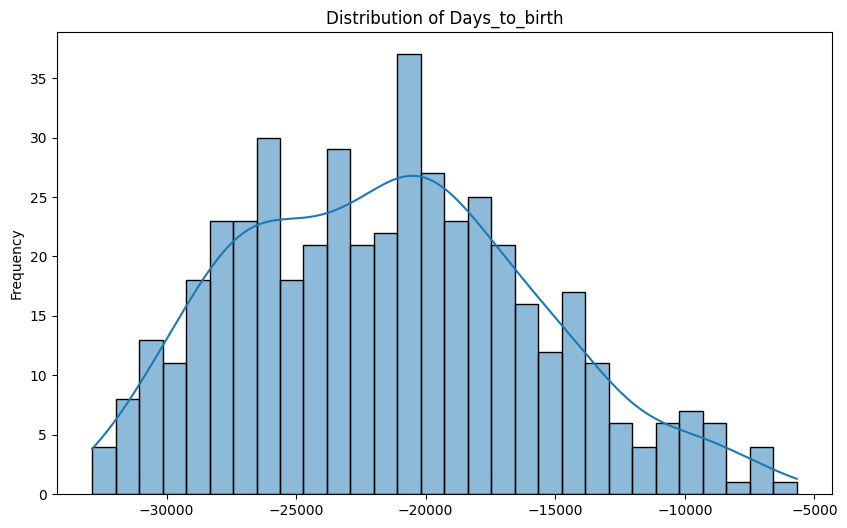

KeyError: 'Melanoma'

<Figure size 1000x600 with 0 Axes>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

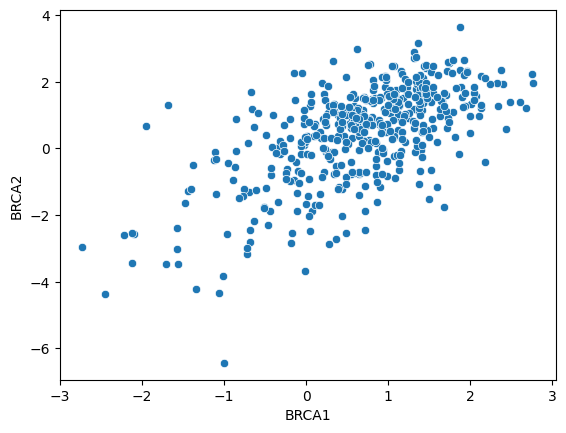

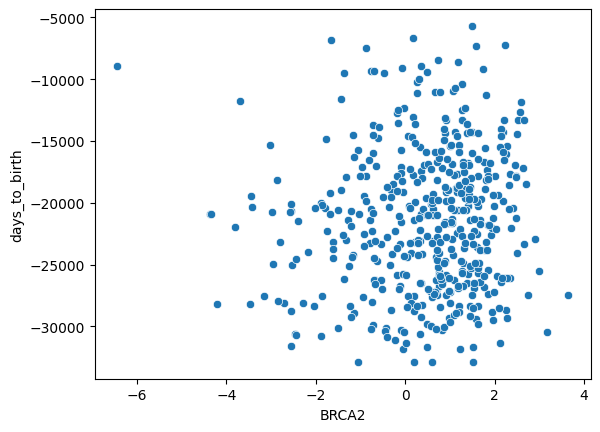

In [19]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [20]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3N-A9WB-06,71,-0.372292,-3.960426,-0.531035,-0.401172,-0.467978,0.13149,-1.101494,-1.715046,0.066001,...,-0.748878,-1.587117,-2.538333,-1.28139,0.472723,1.195114,-1.539227,0.087305,-2.280433,0.453588
TCGA-3N-A9WC-06,82,1.350708,-2.586626,-0.531035,-0.354872,0.237222,0.67979,-0.764494,-1.153546,0.063601,...,-0.748878,-1.587117,1.022467,-1.28139,1.226923,-1.150586,-1.646827,0.607805,-1.865233,0.112588
TCGA-3N-A9WD-06,82,0.072208,-0.610426,-0.531035,-0.348672,0.015422,0.44469,0.099806,0.897254,-0.423399,...,-0.748878,1.862983,0.330167,-0.00729,-0.181177,0.192514,-0.021227,0.501005,1.374567,0.036188
TCGA-BF-A1PU-01,46,-0.467292,-2.587926,-0.531035,-0.124072,-1.788178,-0.19171,-0.117594,-0.239446,-0.423399,...,0.451922,-1.587117,-1.235633,-1.28139,1.513323,0.869314,0.085073,0.026605,-0.327233,-0.036812
TCGA-BF-A1PV-01,74,-1.963792,-5.554726,-0.153735,-0.270672,0.070922,0.14779,-0.094394,-2.379146,-0.046099,...,-0.371578,-1.587117,-2.992733,-1.28139,1.080523,1.701614,-1.736627,-0.129495,-0.886933,-0.215212


In [21]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_19644\2284219672.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std


KeyError: 'Melanoma'

In [22]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

NameError: name 'y' is not defined

In [23]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

NameError: name 'gene_result' is not defined